In [2]:
%matplotlib inline

# Importamos las librerías
import matplotlib
import numpy as np

# la librería matplotlib con el alias
import matplotlib.pyplot as plt

## Representar la función del coseno

In [2]:
# Calculamos un array de -2*PI a +2*PI con paso 0.1
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

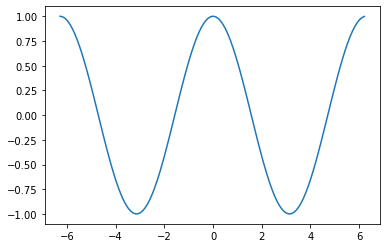

In [4]:
# Representamos el array x frente al valor de cos(x)
plt.plot(x, np.cos(x))

Text(0, 0.5, 'cos(x)')

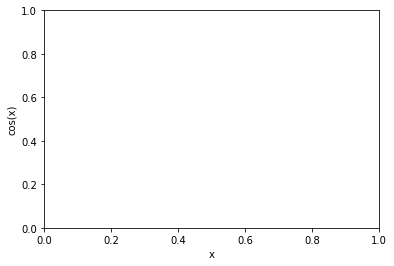

In [5]:
# Añadimos los nombres a los ejes x e y respectivamente
plt.xlabel("x")
plt.ylabel("cos(x)")

In [6]:
# Finalmente podemos mostrar el gráfico
plt.show()

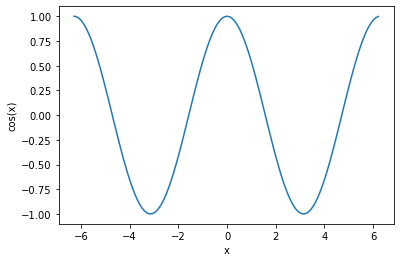

In [8]:
plt.plot(x, np.cos(x))
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.show()

## Representar las funciones coseno y seno a la vez

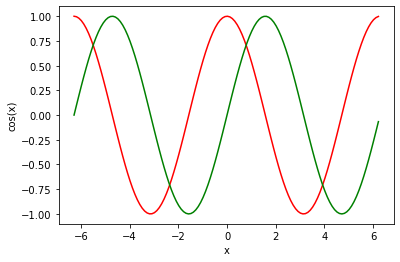

In [10]:
plt.plot(x, np.cos(x), 'r', x, np.sin(x), 'g')
# De forma alternativa podemos siempre separar los dos puntos
# plt.plot(x, np.cos(x), 'r')
# plt.plot(x, np.sin(x), 'g')

# Añadimos las etiquetas
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.show()

## Ejemplo con un histograma

In [11]:
# Generamos un array utilizando unos parámetros y valores aleatorios
mu, sigma = 50, 7
x = mu + sigma * np.random.randn(10000)

No handles with labels found to put in legend.


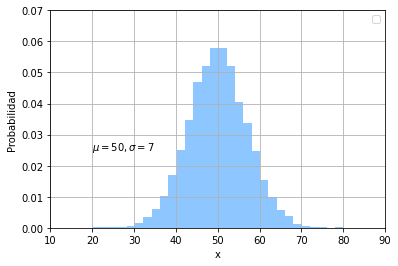

In [25]:
# Utilizamos la función hist
n, bins, patches = plt.hist(x, 30, density=1, facecolor='dodgerblue', alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probabilidad")

# Añadimos un texto indicando los valores en el gráfico
plt.text(20, .025, r'$\mu=50, \sigma=7$')

# Controlamos manualmente los valores en los ejes 
# que se corresponde al array [xmin, xmax, ymin, ymax]
plt.axis([10, 90, 0, 0.07])

# Mostramos la rejilla
plt.grid(True)

# Mostramos la leyenda
plt.legend()
plt.show()

## Buscar cristales de proteínas

In [3]:
from scipy import ndimage
import matplotlib.image as mpimg

In [5]:
# Cargamos la imagen
im = mpimg.imread("/content/Cryoem_groel.png")

In [6]:
im

array([[0.50980395, 0.41960785, 0.44705883, ..., 0.6313726 , 0.3019608 ,
        0.41960785],
       [0.43529412, 0.4509804 , 0.36078432, ..., 0.46666667, 0.3254902 ,
        0.25882354],
       [0.39607844, 0.3529412 , 0.3372549 , ..., 0.30980393, 0.3647059 ,
        0.32941177],
       ...,
       [0.27450982, 0.28235295, 0.40392157, ..., 0.5647059 , 0.4862745 ,
        0.4117647 ],
       [0.36862746, 0.38039216, 0.4117647 , ..., 0.65882355, 0.5568628 ,
        0.47058824],
       [0.46666667, 0.38431373, 0.37254903, ..., 0.6392157 , 0.48235294,
        0.3372549 ]], dtype=float32)

In [7]:
# Realizamos una copia de la image para manipularla
image = im.copy()

In [8]:
# Aplicamos un filtro del tipo gaussiano con tamaño kernel 3
im_g = ndimage.gaussian_filter(image, 3)

# aplicamos la normalización a los valores en MinMax Scale
im_norm = (im_g - im_g.min()) / (float(im_g.max()) - im_g.min())
im_norm[im_norm < 0.5] = 0
im_norm[im_norm >= 0.5] = 1

In [9]:
# Convertimos la imagen resultado para utilizar la función de etiquetado
result = 255 - (im_norm * 255).astype(np.uint8)

In [10]:
result

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0]], dtype=uint8)

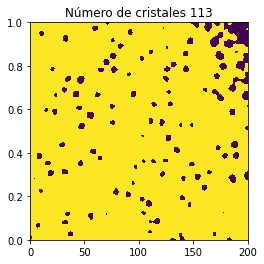

In [11]:
# Indentificamos el número de cristales de proteínas y los mostramos con el valor
plt.title(u"Número de cristales %d" % ndimage.label(result)[1])
img = plt.imshow(np.asarray(im_norm), interpolation="nearest",
                 extent=[0,200, 0,1], aspect=200)
plt.show()

## Aplicamos el filtro spectral a una imagen

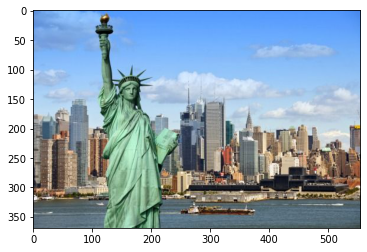

In [12]:
nyc = mpimg.imread("/content/nueva-york-imprescindibl.jpg")
plt.imshow(nyc)

In [13]:
# convertimos en escala de grises
grises = np.mean(nyc, 2)

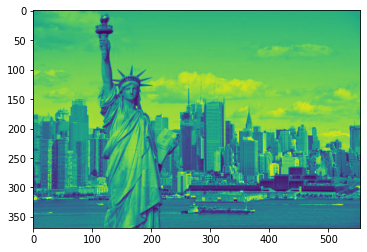

In [14]:
plt.imshow(grises)

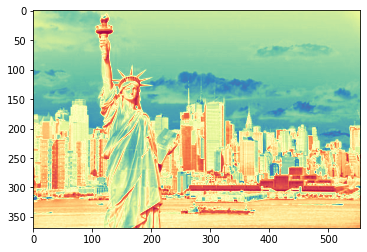

In [15]:
plt.imshow(grises, cmap="Spectral")

## Countplot

In [16]:
# Cargamos un dataset con seaborn
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.shape

(344, 7)

In [17]:
type(penguins)

pandas.core.frame.DataFrame

In [18]:
penguins.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,Female
234,Gentoo,Biscoe,45.8,14.6,210.0,4200.0,Female
132,Adelie,Dream,36.8,18.5,193.0,3500.0,Female
67,Adelie,Biscoe,41.1,19.1,188.0,4100.0,Male
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,Female
44,Adelie,Dream,37.0,16.9,185.0,3000.0,Female
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,Female


In [44]:
penguins['bill_depth_mm'].value_counts()

17.0    12
18.6    10
15.0    10
18.5    10
17.9    10
        ..
20.8     1
13.4     1
17.4     1
20.6     1
13.3     1
Name: bill_depth_mm, Length: 80, dtype: int64

In [23]:
penguins['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [24]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [26]:
penguins[['species', 'island']].value_counts()

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
dtype: int64

In [27]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [28]:
penguins[['species', 'island','sex']].value_counts()

species    island     sex   
Gentoo     Biscoe     Male      61
                      Female    58
Chinstrap  Dream      Male      34
                      Female    34
Adelie     Dream      Male      28
                      Female    27
           Torgersen  Female    24
                      Male      23
           Biscoe     Male      22
                      Female    22
dtype: int64

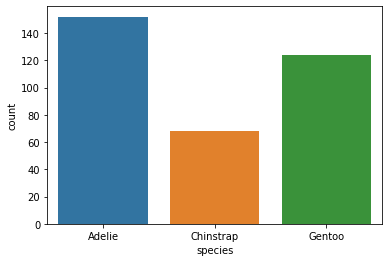

In [29]:
sns.countplot(x=penguins.species)

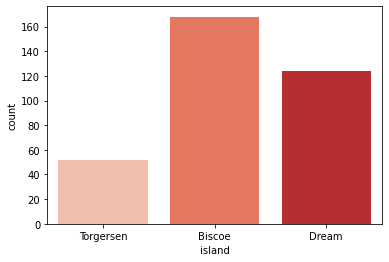

In [30]:
# Añadimos palette para mostrar los colores
sns.countplot(x=penguins['island'], palette="Reds")

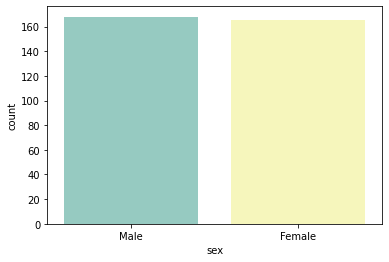

In [31]:
sns.countplot(x=penguins.sex, palette="Set3")

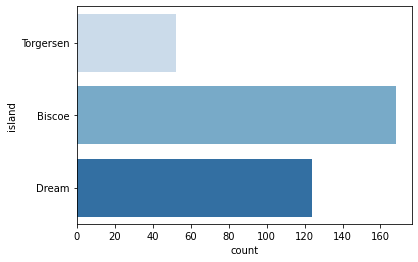

In [32]:
sns.countplot(y=penguins.island, palette="Blues")

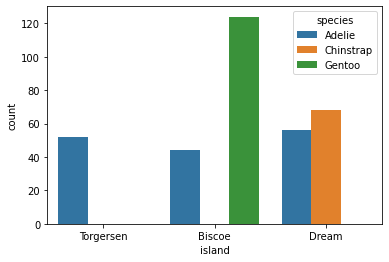

In [33]:
sns.countplot(x=penguins.island, hue=penguins.species)

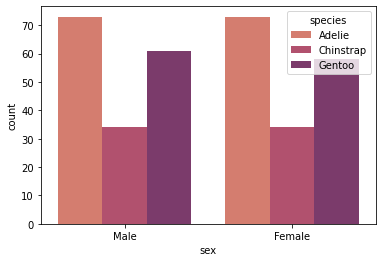

In [39]:
sns.countplot(x=penguins.sex, hue=penguins.species,
              palette='flare', dodge=True) # dodge = True agrupado o apilado False

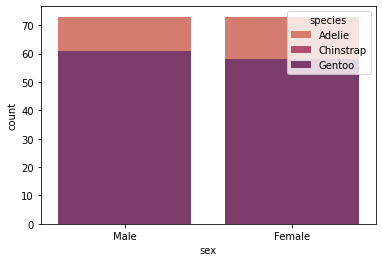

In [40]:
sns.countplot(x=penguins.sex, hue=penguins.species,
              palette='flare', dodge=False)

In [41]:
# Cargamos los datos titanic.csv
import pandas as pd
titanic_df = pd.read_csv("https://raw.githubusercontent.com/marcusRB/IDbootcamps_DataScience_student_PT_10201/master/dataset/titanic.csv")

In [43]:
titanic_df.shape

(891, 12)

In [42]:
# sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [46]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.00,0,0,350035,7.7958,NaN,S
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
702,703,0,3,"Barbara, Miss. Saiide",female,18.00,0,1,2691,14.4542,NaN,C
555,556,0,1,"Wright, Mr. George",male,62.00,0,0,113807,26.5500,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C


In [45]:
titanic_df.Cabin.nunique()

147

In [47]:
titanic_df.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F33            3
              ..
C82            1
C90            1
A20            1
A19            1
B4             1
Name: Cabin, Length: 147, dtype: int64

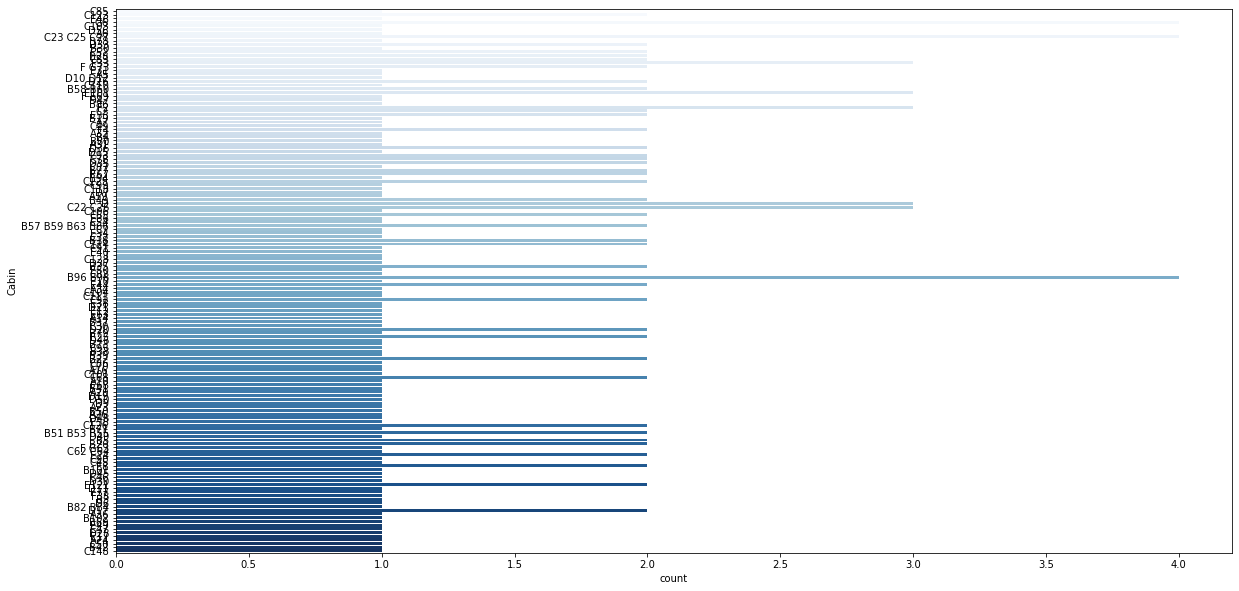

In [49]:
plt.figure(figsize=[20,10])
sns.countplot(y=titanic_df.Cabin, palette="Blues")

<Figure size 1440x720 with 0 Axes>

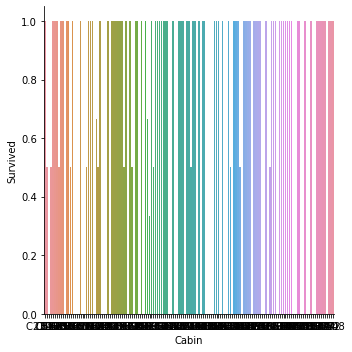

In [52]:
plt.figure(figsize=[20,10])
sns.catplot(x="Cabin", y="Survived", data=titanic_df, kind="bar", ci=None)

In [54]:
# Una alternativa para poder manipular la información y mostrar los datos de Cabin
titanic_df['inCabin'] = ~titanic_df["Cabin"].isnull()

In [55]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inCabin
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,False
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,False
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,False
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,False
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,False
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q,False
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S,False
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S,False
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,True
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,False


In [57]:
titanic_df.Cabin.isnull().sum()/titanic_df.shape[0]*100

77.10437710437711

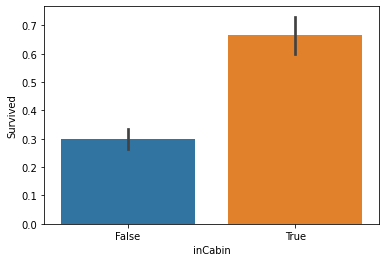

In [59]:
sns.barplot(x="inCabin", y="Survived", data=titanic_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


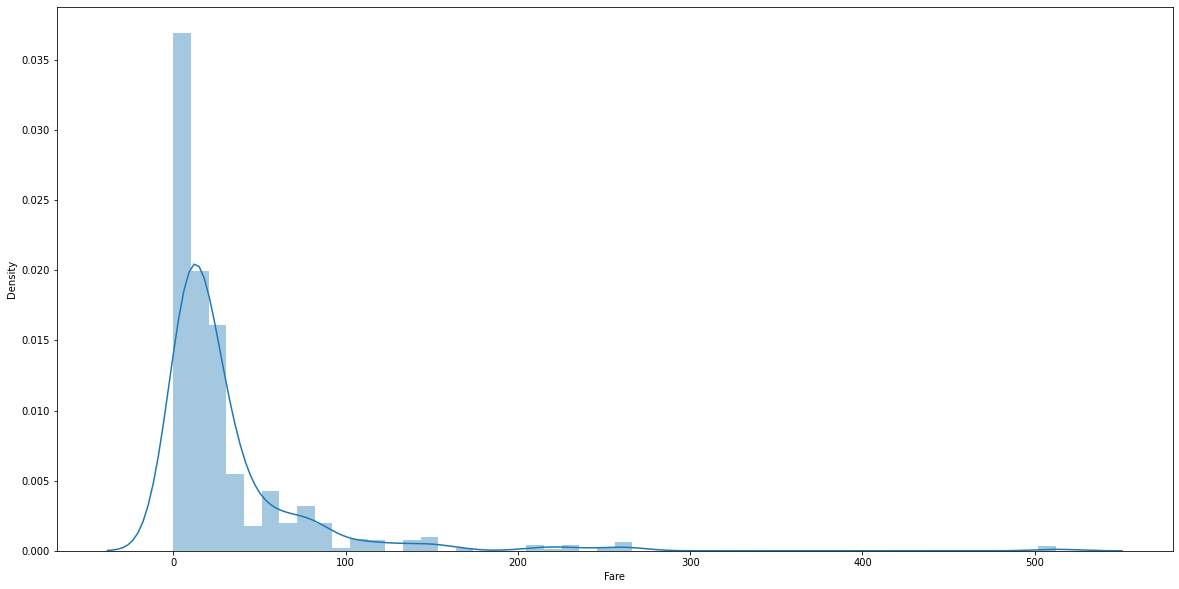

In [61]:
plt.figure(figsize=[20,10])
sns.distplot(titanic_df['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


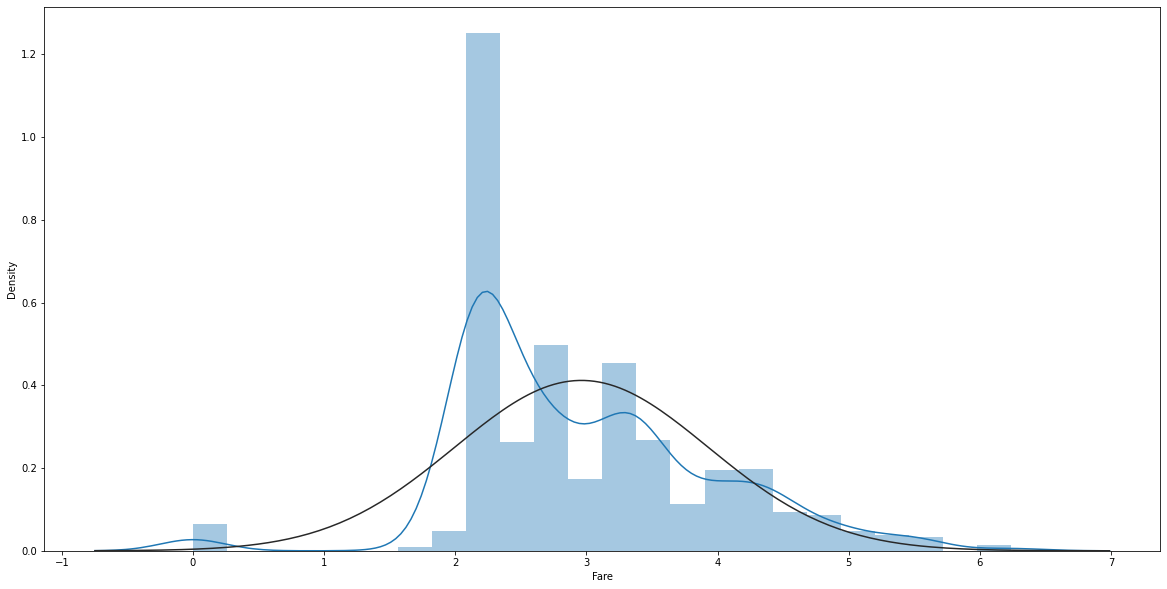

In [67]:
# Podemos mejorar la visualización
from scipy.stats import norm, skew
plt.figure(figsize=[20,10])
sns.distplot(np.log1p(titanic_df['Fare']), fit=norm)

## Aplicar el proceso de agrupación

In [70]:
labels=['A','B','C','D','E']
titanic_df['FareGroup'] = pd.qcut(titanic_df['Fare'], 5,
                                  labels=labels)

In [69]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inCabin,FareGroup
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,False,B
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S,False,A
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S,True,E
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,False,B
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,False,B
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,False,C
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,False,A
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C,True,D
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,True,E
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S,False,C


In [71]:
# Visualizamos los nuevos datos
titanic_df[['FareGroup','Survived']].groupby(['FareGroup'], as_index=False).mean()

,FareGroup,Survived
0,A,0.217877
1,B,0.201087
2,C,0.424419
3,D,0.444444
4,E,0.642045


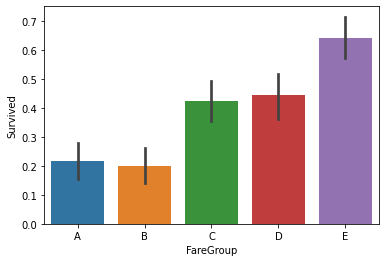

In [75]:
sns.barplot(x="FareGroup", y="Survived", data=titanic_df)

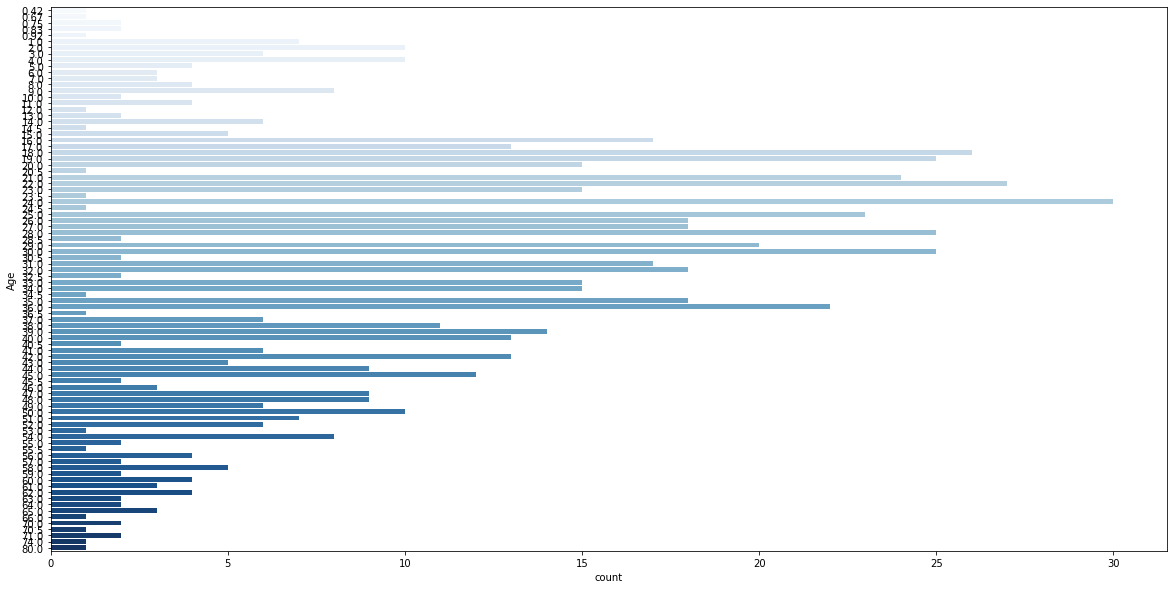

In [77]:
plt.figure(figsize=[20,10])
sns.countplot(y=titanic_df.Age, palette="Blues")

In [78]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [79]:
titanic_df['Age'].nunique()

88

In [80]:
# Podemos discretizar esta variable con el método qcut o cut
labels=['A','B','C','D','E']
titanic_df['AgeGroup_qcut'] = pd.qcut(titanic_df['Age'], 5,
                                  labels=labels)

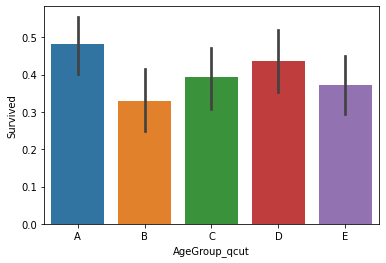

In [81]:
sns.barplot(x="AgeGroup_qcut", y="Survived", data=titanic_df)

In [82]:
# Para poder realizar una agrupación por n grupos de edades
bins = [-np.inf, 12, 25, 45, 60, np.inf]
labels = ['Unknow', "Teenager", "YoungAdult", "Adult", "Senior"]

# Hay que tratar los valores nulos o vacios antes de aplicar pd.cut
titanic_df['Age'] = titanic_df['Age'].fillna(-0.5) # imputamos a los valores nulos un -0.5
titanic_df['AgeGroup_cut'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

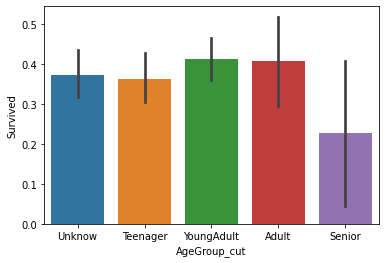

In [83]:
sns.barplot(x="AgeGroup_cut", y="Survived", data=titanic_df)

In [84]:
# también un extremo
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic_df['AgeGroup_cut_2'] = pd.cut(titanic_df["Age"], bins, labels = labels)

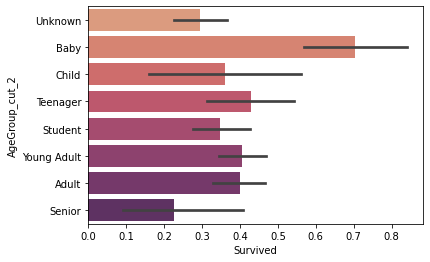

In [85]:
sns.barplot(y="AgeGroup_cut_2", x='Survived', data=titanic_df, palette="flare")

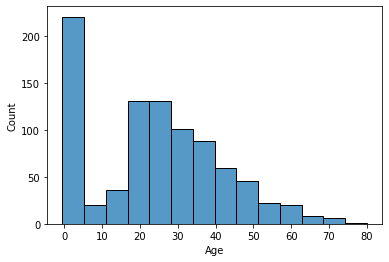

In [86]:
# para poder representar gráficamente un histograma bins=default
sns.histplot(x=titanic_df['Age'])

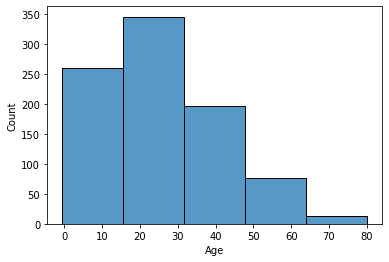

In [87]:
sns.histplot(x=titanic_df['Age'], bins=5)

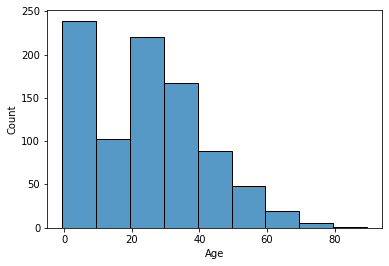

In [88]:
sns.histplot(x=titanic_df['Age'], binwidth=10)

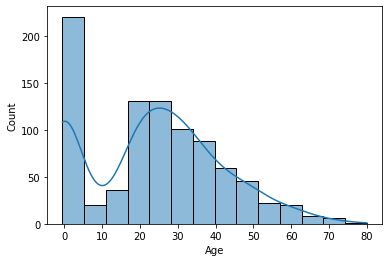

In [90]:
sns.histplot(x=titanic_df['Age'], kde=True) # permite aproximar la distribución

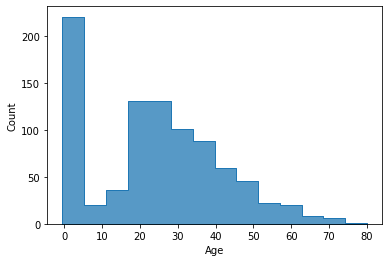

In [91]:
sns.histplot(x=titanic_df['Age'], element='step') # añadir pasos

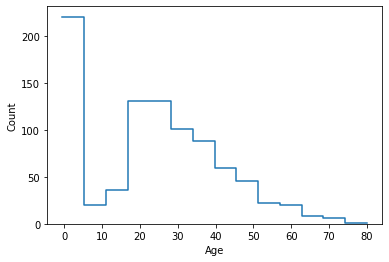

In [92]:
sns.histplot(x=titanic_df['Age'], element='step', fill=False) # añadir pasos y quitamos el relleno

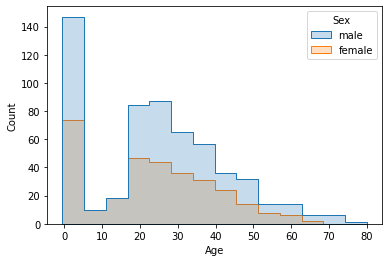

In [93]:
sns.histplot(x=titanic_df['Age'], hue=titanic_df['Sex'], element='step')

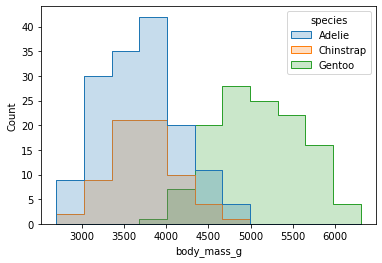

In [94]:
sns.histplot(x=penguins.body_mass_g, hue=penguins.species, element='step')

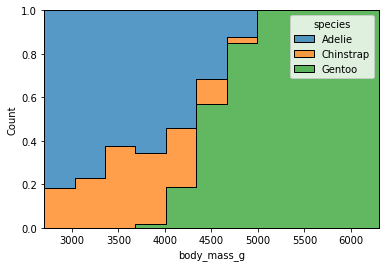

In [95]:
sns.histplot(x=penguins.body_mass_g, hue=penguins.species, element='step',
             multiple="fill")

## Kdeplot

útil para una variable numérica, es similar al histograma pero sin mostrar las barras. Permite mostrar la aproximación de la distribución.

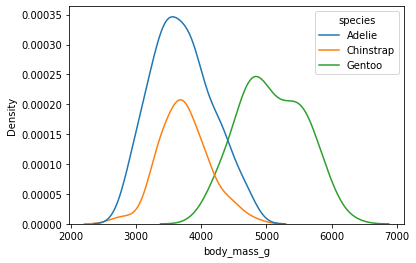

In [96]:
sns.kdeplot(x=penguins.body_mass_g, hue=penguins.species)

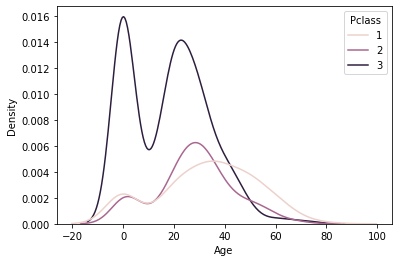

In [97]:
sns.kdeplot(x=titanic_df.Age, hue=titanic_df.Pclass)

## Scatterplot

muy útil para 2 variables numéricas y definir su correlación

In [98]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


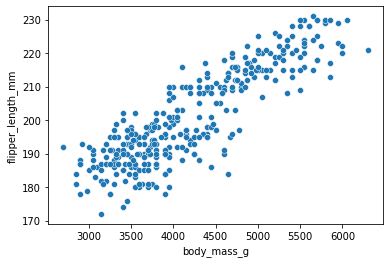

In [99]:
# Mostramos gráficamente el gráfico de dispersión
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins)

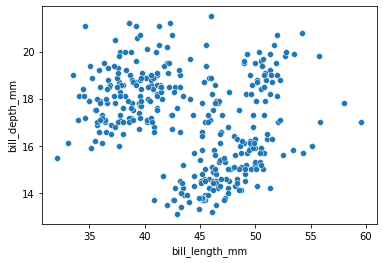

In [101]:
# Mostramos gráficamente el gráfico de dispersión
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", data=penguins)

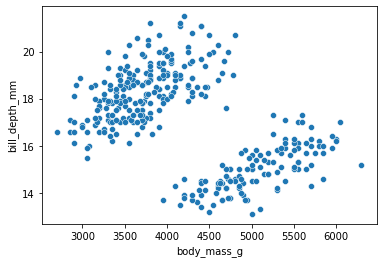

In [102]:
sns.scatterplot(x="body_mass_g", y="bill_depth_mm", data=penguins)

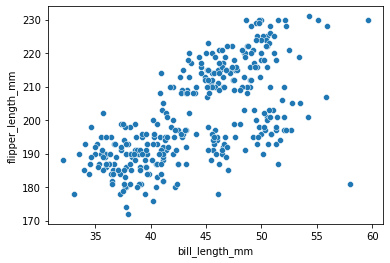

In [103]:
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=penguins)

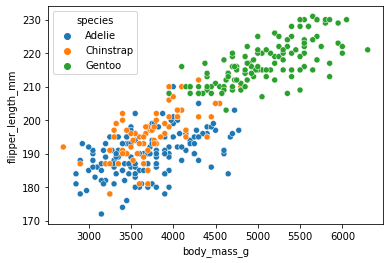

In [105]:
# Mostramos gráficamente el gráfico de dispersión
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", hue="species", data=penguins)

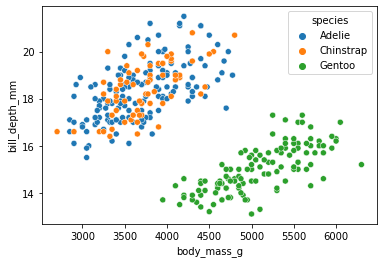

In [106]:
sns.scatterplot(x="body_mass_g", y="bill_depth_mm", hue="species", data=penguins)

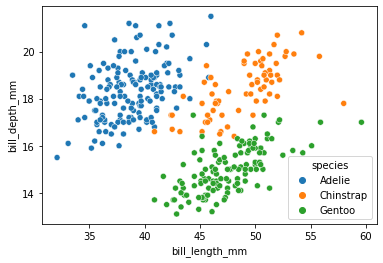

In [108]:
# Mostramos gráficamente el gráfico de dispersión
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=penguins)

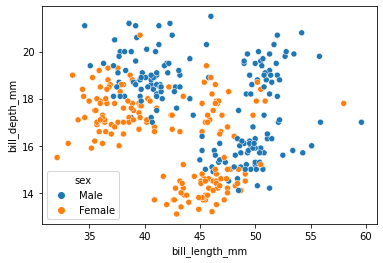

In [112]:
# Mostramos gráficamente el gráfico de dispersión
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="sex", data=penguins)

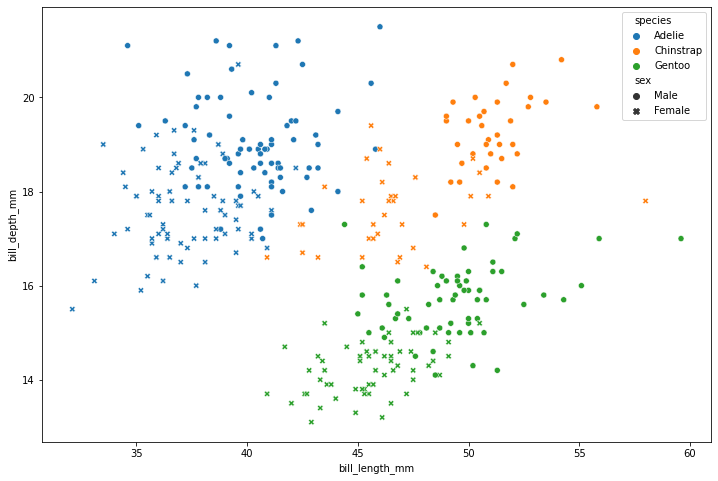

In [117]:
# Utilizamos el style para marcar las zonas
%matplotlib notebook
%matplotlib inline
plt.figure(figsize=[12,8])
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", style="sex", data=penguins)

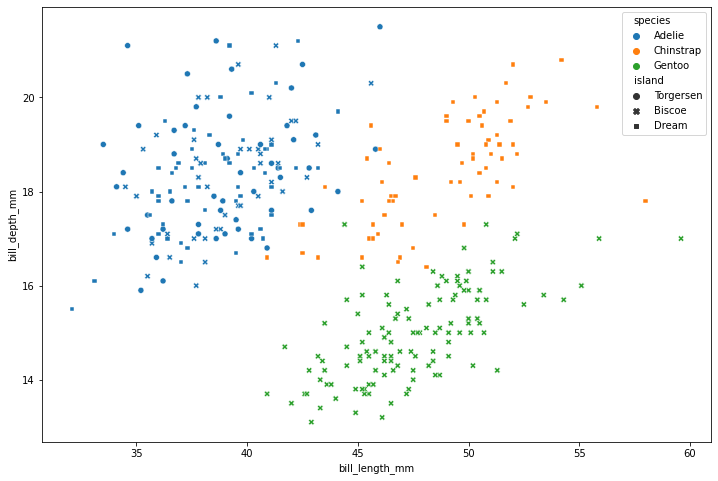

In [118]:
plt.figure(figsize=[12,8])
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", style="island", data=penguins)

## Jointplot

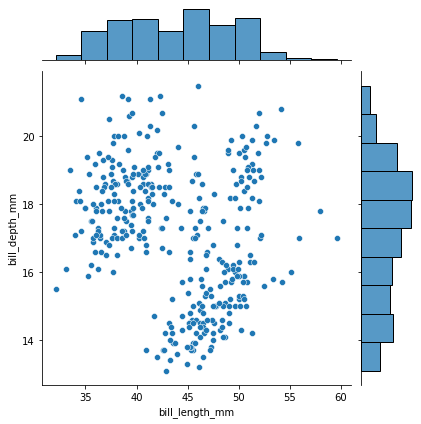

In [121]:
sns.jointplot(x="bill_length_mm", y="bill_depth_mm", data=penguins)

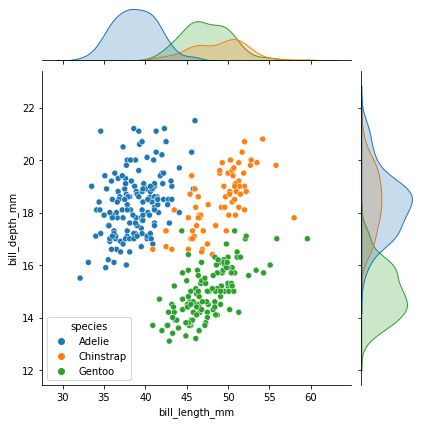

In [120]:
sns.jointplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=penguins)

## Pairplot

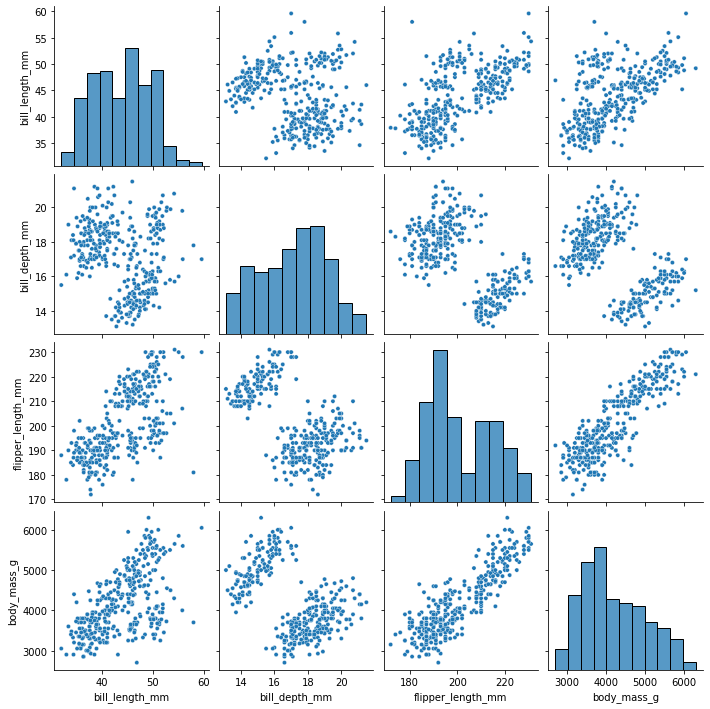

In [122]:
sns.pairplot(data=penguins, plot_kws={'size':1})

## Boxplot

Representación numérica de los valores máximo y mínimo, 25%, 75%, 50%.

In [123]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.699966,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.731181,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,-0.500000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
titanic_df['Age'].describe()

count    891.000000
mean      23.699966
std       17.731181
min       -0.500000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

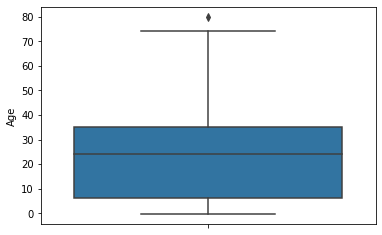

In [124]:
sns.boxplot(y="Age", data=titanic_df)

In [126]:
np.median(titanic_df['Age'])

24.0

In [128]:
q1 = titanic_df['Age'].quantile(.25)
q1

6.0

In [130]:
q2 = titanic_df['Age'].quantile(.50)
q2

24.0

In [131]:
q3 = titanic_df['Age'].quantile(.75)
q3

35.0

In [132]:
# Rango intercuartil
iqr = q3 - q1
iqr

29.0

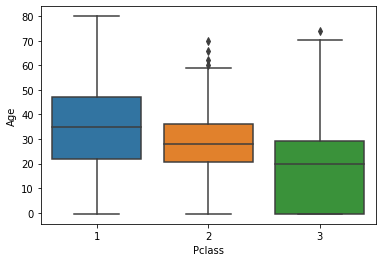

In [133]:
sns.boxplot(x="Pclass", y="Age", data=titanic_df)

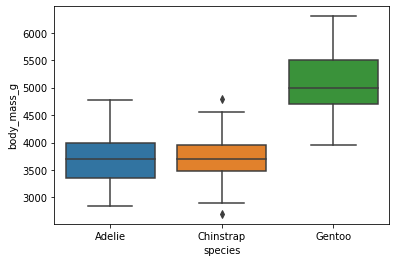

In [134]:
sns.boxplot(x="species", y="body_mass_g", data=penguins)

## Pie Chart

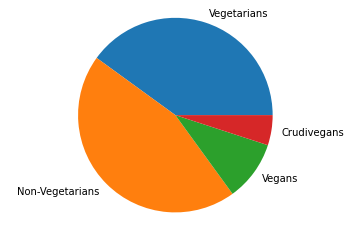

In [135]:


labels = ['Vegetarians', 'Non-Vegetarians', 'Vegans', 'Crudivegans']
sizes = [40, 45, 10, 5]

plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()



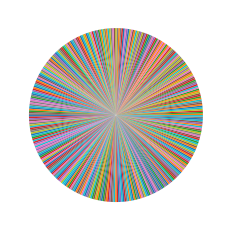

In [137]:

plt.pie(titanic_df['Survived'])
plt.show()

## Facet grid

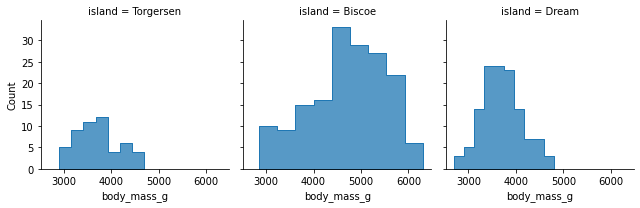

In [138]:
g = sns.FacetGrid(data=penguins, col="island")
g.map_dataframe(sns.histplot, x="body_mass_g", element="step")

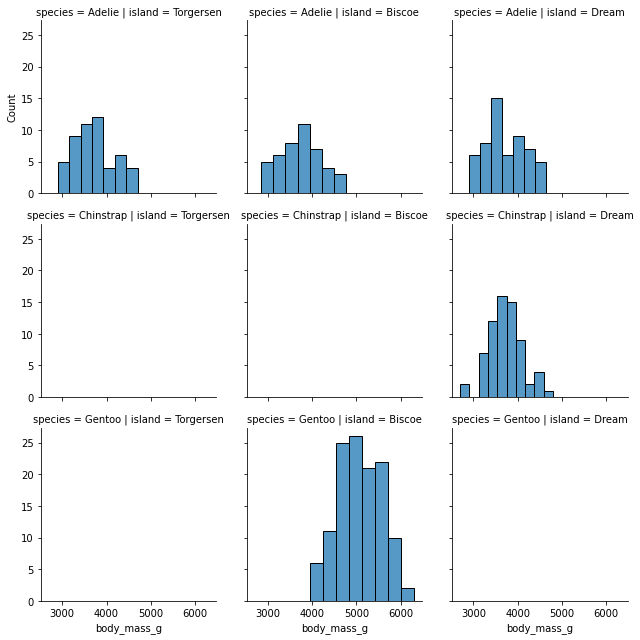

In [139]:
g = sns.FacetGrid(data=penguins, col="island", row="species")
g.map_dataframe(sns.histplot, x="body_mass_g")

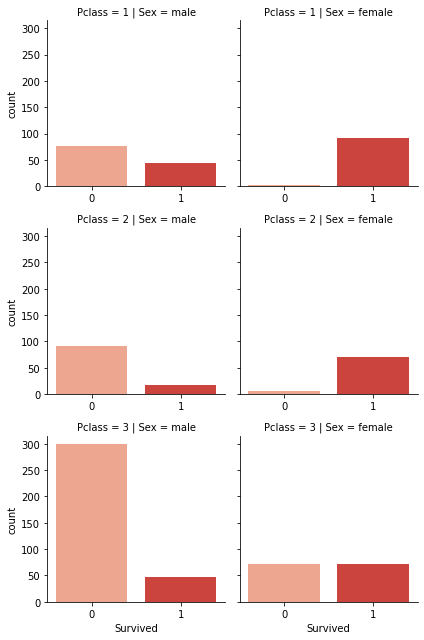

In [141]:
g = sns.FacetGrid(data=titanic_df, col="Sex", row="Pclass", sharex=False)
g.map_dataframe(sns.countplot, x="Survived", palette="Reds")

## Guardar los elementos visuales

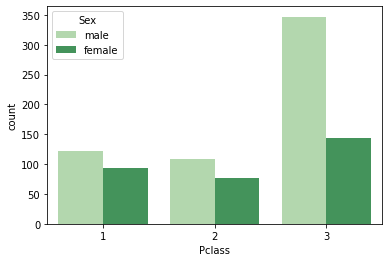

In [145]:
sns_plot = sns.countplot(x=titanic_df.Pclass, hue=titanic_df.Sex, palette="Greens")

In [148]:
# Si queremos guardar las imagenes y utilizando el parámetro dpi para que podamos definir la resolución
sns_plot.figure.savefig('class_and_gender10.jpg', dpi=10)

In [149]:
sns_plot.figure.savefig('class_and_gender100.jpg', dpi=100)

In [150]:
sns_plot.figure.savefig('class_and_gender1000.jpg', dpi=1000)

In [151]:
sns_plot.figure.savefig('class_and_gender3000.jpg', dpi=3000)